# Main results
In this script the main results from the project *Online Reinforcement Learning with Augmented Data on the OpenAI ProcGen Benchmark* is reproduced. The project was carried out by Jacob Bahnsen Schmidt (s184346) and Kasper Schou Telkamp (s170397) in the DTU course 02456 Deep Learning in the Fall of 2021.

At first we load in the packages needed and define the functions needed to produce the plots

In [17]:
import torch
import imageio
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Video

# To calculate the moving average for plotting.
def moving_average(a, n=10) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret / n

### Figures
In this project we worked on three different models. One based on the Nature CNN model architecture, and two based on the deep IMPALA CNN architecture. The two IMPALA CNN models differend in the input received by the agent. Now we load the training and validation results for the three final models and construct the plot.

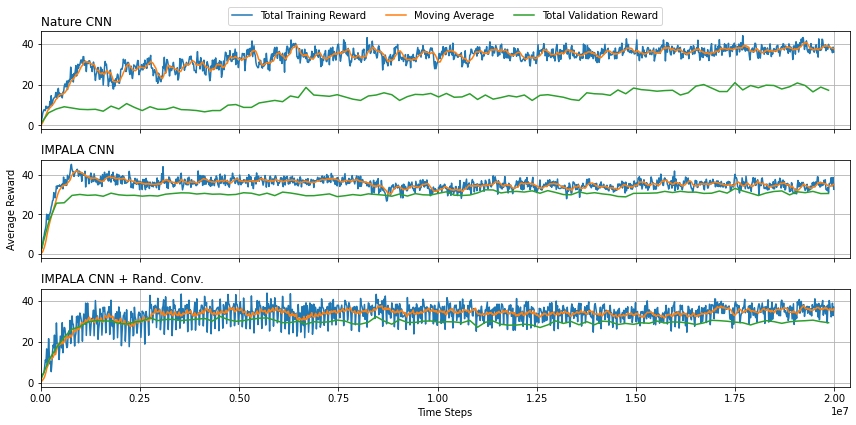

In [18]:
# Models to make plots for
baseline="baseline_v6"
IMPALA="IMPALA_v6"
IMPALA_rand_conv="IMPALA_rand_conv_v8"

total_training_reward_baseline = torch.load('trainingResults/training_Reward_' + baseline + '.pt')
total_training_reward_IMPALA = torch.load('trainingResults/training_Reward_' + IMPALA + '.pt')
total_training_reward_rand_conv = torch.load('trainingResults/training_Reward_' + IMPALA_rand_conv + '.pt')

x_train_baseline = range(0, (len(total_training_reward_baseline))*8192*2, 8192*2)
x_train_IMPALA = range(0, (len(total_training_reward_IMPALA))*8192*2, 8192*2)
x_train_rand_conv = range(0, (len(total_training_reward_rand_conv))*8192*2, 8192*2)

total_validation_reward_baseline = torch.load('trainingResults/validation_Reward_' + baseline + '.pt')
total_validation_reward_IMPALA = torch.load('trainingResults/validation_Reward_' + IMPALA + '.pt')
total_validation_reward_rand_conv = torch.load('trainingResults/validation_Reward_' + IMPALA_rand_conv + '.pt')

x_val_baseline = range(0, (len(total_validation_reward_baseline))*196608, 196608)
x_val_IMPALA = range(0, (len(total_validation_reward_IMPALA))*196608, 196608)
x_val_rand_conv = range(0, (len(total_validation_reward_rand_conv))*196608, 196608)

plt.subplots(nrows=3,ncols=1,sharex='col', figsize=(12,6))
# Baseline
plt.subplot(3,1,1)
plt.plot(x_train_baseline, total_training_reward_baseline, label='Total Training Reward')
plt.plot(x_train_baseline,moving_average(total_training_reward_baseline), label = 'Moving Average')
plt.plot(x_val_baseline, total_validation_reward_baseline, label='Total Validation Reward')
plt.legend(loc='upper center', bbox_to_anchor=(0.5,1.3), ncol=3, fancybox=True)
plt.title(label='Nature CNN', loc='left')
plt.grid()
# IMPALA
plt.subplot(3,1,2)
plt.plot(x_train_IMPALA, total_training_reward_IMPALA)
plt.plot(x_train_IMPALA,moving_average(total_training_reward_IMPALA))
plt.plot(x_val_IMPALA, total_validation_reward_IMPALA)
plt.ylabel('Average Reward')
plt.grid()
plt.title(label='IMPALA CNN', loc='left')
# Rand Conv
plt.subplot(3,1,3)
plt.plot(x_train_rand_conv, total_training_reward_rand_conv)
plt.plot(x_train_rand_conv,moving_average(total_training_reward_rand_conv))
plt.plot(x_val_rand_conv, total_validation_reward_rand_conv)
plt.xlabel('Time Steps')
plt.title(label='IMPALA CNN + Rand. Conv.', loc='left')
plt.xlim((0, max(x_train_baseline)*1.02))
plt.grid()
plt.tight_layout(h_pad=1.1)
plt.show()

### Videos

To illustrate the performance of the different models, we will visualize the performance of the agents in a ~20 seconds video.

First we show the **Nature CNN** model:

In [19]:
Video(data="videos/" + baseline + "with background.mp4")

Then the **IMPALA CNN** model

In [20]:
Video("videos/" + IMPALA + "with background.mp4")

And lastly the **IMPALA CNN + RANDOM CONVOLUTION** model

In [21]:
Video("videos/" + IMPALA_rand_conv + "with background and rand conv.mp4")